Scraping NFL.com for Kickoff data 
- year
- team
- number of kickoffs
- number of touchbacks
- number of returns 

In [147]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

kickoff_df = pd.DataFrame()

years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

for year in years:
    current_year = [year] * 32
    teams = []
    kickoffs = []
    touchbacks = []
    returns = []

    url = f"https://www.nfl.com/stats/team-stats/special-teams/kickoffs/{year}/reg/all"
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    table_rows = soup.find_all("tr")

    for row in table_rows[1:]:
        cells = row.find_all("td")
        teams.append(cells[0].text.split()[0])
        kickoffs.append(cells[1].text.split()[0])
        touchbacks.append(cells[3].text.split()[0])
        returns.append(cells[5].text.split()[0])
    current_df = pd.DataFrame({"year": current_year, "team": teams, "kickoffs": kickoffs, "touchbacks": touchbacks, "returns": returns})
    kickoff_df = pd.concat([kickoff_df, current_df])

Calculate return rate and touchback rate 

In [191]:
kickoff_df[["kickoffs", "touchbacks", "returns"]] = kickoff_df[["kickoffs", "touchbacks", "returns"]].apply(pd.to_numeric)

kickoff_df["return rate"] = (kickoff_df["returns"] / kickoff_df["kickoffs"]) * 100
kickoff_df["touchback rate"] = (kickoff_df["touchbacks"] / kickoff_df["kickoffs"]) * 100

Compare average return rate and average touchback rate over the last 10 years

Lowest Return Rate in Last 10 Years: 22.07% in 2023
Highest Return Rate in Last 10 Years: 47.13% in 2014
New Rules Return Rate (through first 4 weeks of season): 28.63% 

Lowest Touchback Rate in Last 10 Years: 50.04% in 2014
Highest Touchback Rate in Last 10 Years: 72.63% in 2023
New Rules Touchback Rate (through first 4 weeks of season): 68.50%


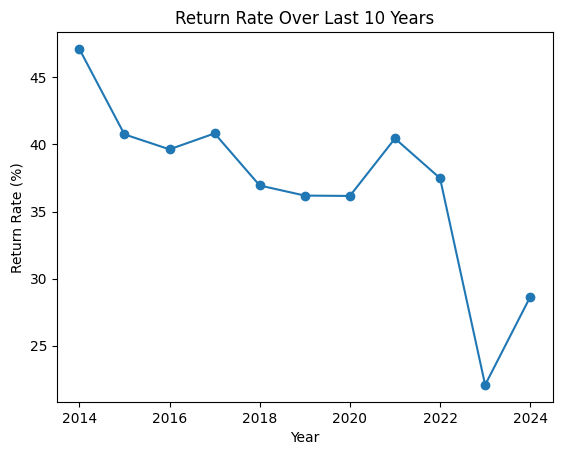

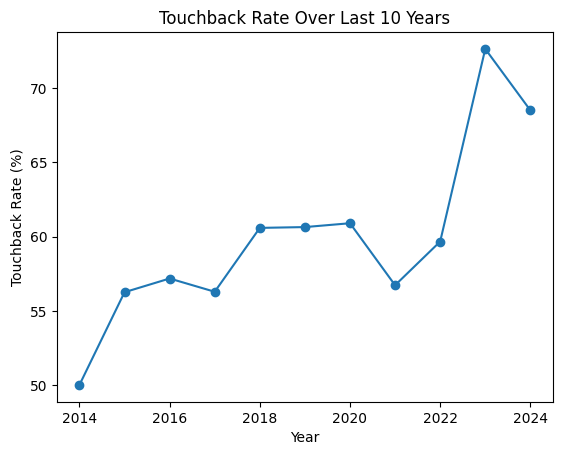

In [258]:
import matplotlib.pyplot as plt 

average_return_rate = kickoff_df.groupby("year")["return rate"].mean()
average_touchback_rate = kickoff_df.groupby("year")["touchback rate"].mean()

min_average_return_rate = average_return_rate[average_return_rate == average_return_rate.min()]
print(f"Lowest Return Rate in Last 10 Years: {min_average_return_rate.values[0]:.2f}% in {min_average_return_rate.index[0]}")
max_average_return_rate = average_return_rate[average_return_rate == average_return_rate.max()]
print(f"Highest Return Rate in Last 10 Years: {max_average_return_rate.values[0]:.2f}% in {max_average_return_rate.index[0]}")
print(f"New Rules Return Rate (through first 4 weeks of season): {average_return_rate.tail(1).values[0]:.2f}% ")

min_average_touchback_rate = average_touchback_rate[average_touchback_rate == average_touchback_rate.min()]
print(f"\nLowest Touchback Rate in Last 10 Years: {min_average_touchback_rate.values[0]:.2f}% in {min_average_touchback_rate.index[0]}")
max_average_touchback_rate = average_touchback_rate[average_touchback_rate == average_touchback_rate.max()]
print(f"Highest Touchback Rate in Last 10 Years: {max_average_touchback_rate.values[0]:.2f}% in {max_average_touchback_rate.index[0]}")
print(f"New Rules Touchback Rate (through first 4 weeks of season): {average_touchback_rate.tail(1).values[0]:.2f}%")

plt.plot(average_return_rate, marker="o")
plt.title("Return Rate Over Last 10 Years")
plt.xlabel("Year")
plt.ylabel("Return Rate (%)")
plt.show()

plt.plot(average_touchback_rate, marker="o")
plt.title("Touchback Rate Over Last 10 Years")
plt.xlabel("Year")
plt.ylabel("Touchback Rate (%)")
plt.show()

Scraping NFL.com for Kickoff Return data
- year
- team
- number of kickoffs returned for touchdown
- number of 20+ yard returns
- number of 40+ yard returns 

In [227]:
return_df = pd.DataFrame()

years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

for year in years:
    current_year = [year] * 32
    teams = []
    return_td = []
    return_20 = []
    return_40 = []

    url = f"https://www.nfl.com/stats/team-stats/special-teams/kickoff-returns/{year}/reg/all"
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    table_rows = soup.find_all("tr")

    for row in table_rows[1:]:
        cells = row.find_all("td")
        teams.append(cells[0].text.split()[0])
        return_td.append(cells[4].text.split()[0])
        return_20.append(cells[5].text.split()[0])
        return_40.append(cells[6].text.split()[0])
    current_df = pd.DataFrame({"year": current_year, "team": teams, "returned touchdowns": return_td, "20+ returns": return_20, "40+ returns": return_40})
    return_df = pd.concat([return_df, current_df])


Compare number of return touchdowns, returns of 20+ yards, and returns of 40+ yards over the last 10 years

Number of Returned Touchdowns Last Season: 4
New Rules Number of Returned Touchdowns (through first 4 weeks of the season): 1
New Rules Predicted Number of Returned Touchdowns (if rate stays the same for the rest of the season): 4.5

Number of Returns of 20+ Yards Last Season: 389
New Rules Number of Returns of 20+ Yards (through first 4 weeks of the season): 167
New Rules Predicted Number of Returns of 20+ Yards (if rate stays the same for the rest of the season): 751.5

Number of Returns of 40+ Yards Last Season: 24
New Rules Number of Returns of 40+ Yards (through first 4 weeks of the season): 6
New Rules Predicted Number of Returns of 40+ Yards (if rate stays the same for the rest of the seaosn): 27.0


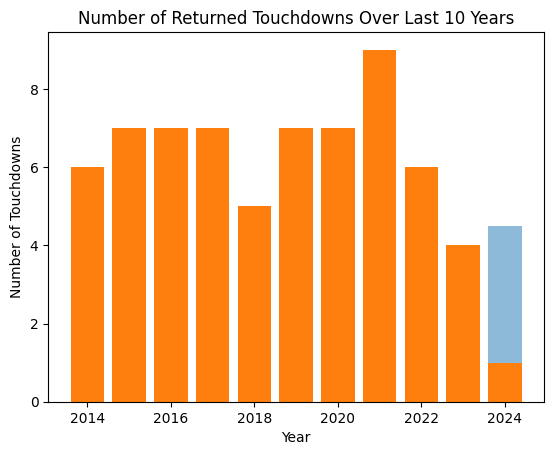

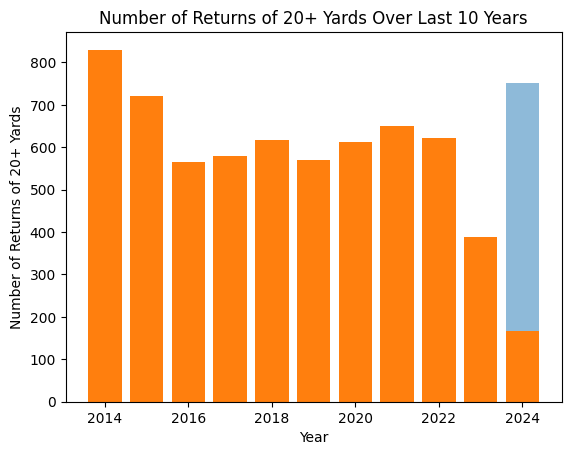

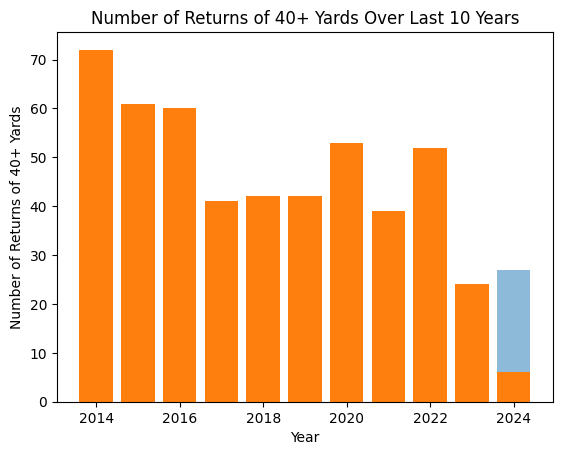

In [290]:
return_df[["returned touchdowns", "20+ returns", "40+ returns"]] = return_df[["returned touchdowns", "20+ returns", "40+ returns"]].apply(pd.to_numeric)

num_returned_touchdowns = return_df.groupby("year")["returned touchdowns"].sum()
num_20returns = return_df.groupby("year")["20+ returns"].sum()
num_40returns = return_df.groupby("year")["40+ returns"].sum()

print(f"Number of Returned Touchdowns Last Season: {num_returned_touchdowns.tail(2).values[0]}")
print(f"New Rules Number of Returned Touchdowns (through first 4 weeks of the season): {num_returned_touchdowns.tail(2).values[1]}")
print(f"New Rules Predicted Number of Returned Touchdowns (if rate stays the same for the rest of the season): {(18/4) * num_returned_touchdowns.tail(2).values[1]}")

print(f"\nNumber of Returns of 20+ Yards Last Season: {num_20returns.tail(2).values[0]}")
print(f"New Rules Number of Returns of 20+ Yards (through first 4 weeks of the season): {num_20returns.tail(2).values[1]}")
print(f"New Rules Predicted Number of Returns of 20+ Yards (if rate stays the same for the rest of the season): {(18/4) * num_20returns.tail(2).values[1]}")

print(f"\nNumber of Returns of 40+ Yards Last Season: {num_40returns.tail(2).values[0]}")
print(f"New Rules Number of Returns of 40+ Yards (through first 4 weeks of the season): {num_40returns.tail(2).values[1]}")
print(f"New Rules Predicted Number of Returns of 40+ Yards (if rate stays the same for the rest of the seaosn): {(18/4) * num_40returns.tail(2).values[1]}")

plt.bar(num_returned_touchdowns.index[-1], (18/4) * num_returned_touchdowns.tail(2).values[1], alpha=0.5)
plt.bar(num_returned_touchdowns.index, num_returned_touchdowns.values)
plt.title("Number of Returned Touchdowns Over Last 10 Years")
plt.xlabel("Year")
plt.ylabel("Number of Touchdowns")
plt.show()

plt.bar(num_20returns.index[-1], (18/4) * num_20returns.tail(2).values[1], alpha=0.5)
plt.bar(num_20returns.index, num_20returns.values)
plt.title("Number of Returns of 20+ Yards Over Last 10 Years")
plt.xlabel("Year")
plt.ylabel("Number of Returns of 20+ Yards")
plt.show()

plt.bar(num_40returns.index[-1], (18/4) * num_40returns.tail(2).values[1], alpha=0.5)
plt.bar(num_40returns.index, num_40returns.values)
plt.title("Number of Returns of 40+ Yards Over Last 10 Years")
plt.xlabel("Year")
plt.ylabel("Number of Returns of 40+ Yards")
plt.show()

Findings:

Have the new kickoff rules been successful in decreasing injuries and increasing the number of returns as the NFL intended?
Data on kickoff injuries has not been made public yet; however, NFL commissioner Roger Goodell has said that early indications are really good. Regarding increasing the number of returns, the data shows progress so far. Over the last 10 years, the number of returns has steadily decreased with a big negative jump in 2023. The highest return rate in the past 10 years was 47.13% in 2014 and the lowest was 22.07% in 2023. This 25% decrease is one of the main factors for changing the rules; the NFL is trying to reinstate the kickoff as an active part of the game. Through the first four weeks of the 2024 season, the return rate is 28.63%. The 6.56% increase from last season indicates the new rules are having their intended effect so far. 

Are the new rules here to stay?
The NFL institued new rules for 2024 alone, with the possibility of making the change more permanent depending on this season's results. Based on Roger Goodell's comments and the return rate data, the new rules have proved effective up to this point in decreasing injuries and increasing the number of returns. It is also important to consider how exciting the new kickoff is for viewers' entertainment. Last year, the number of returned touchdowns was 4, the number of returns of 20+ yards was 389, and the number of returns of 40+ yards was 24. Thus far, there has been 1 returned touchdown, 167 returns of 20+ yards, and 6 returns of 40+ yards this season. If this season's rates stay the same, there will be 4.5 returned touchdowns, 751.5 returns of 20+ yards, and 27.0 returns of 40+ yards, which are all increases from last season. 

In closing, the new NFL kickoff rules have been successful in decreasing injuries, increasing returns, and creating more exciting plays for viewers compared to last season. Unless these trends revert, the new rules will probably become permanent with possible adjustments. 